#### Rashmi S
21BDA02

(A) Pick a dataset, perform EDA and draw conclusions and finally build a Logistic Regression model.
Define the following and evaluate your model by finding the following metrics:
a. Confusion matrix,
b. Precision,
c. Recall,
d. F1-score,
e. Sensitivity,
f. Specificity,
g. Misclassification rate,
h. ROC, AUROC


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df=df.drop(columns=['Id'])

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### No null values

### EDA

<AxesSubplot:>

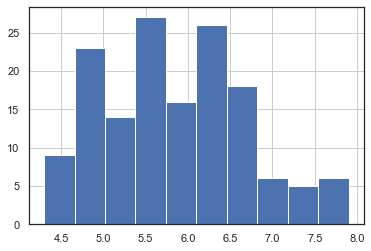

In [10]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

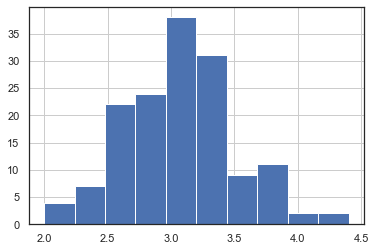

In [11]:
df['SepalWidthCm'].hist()

##### Normal dis- easy for the system to understand the data

<AxesSubplot:>

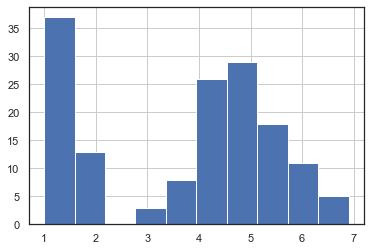

In [12]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

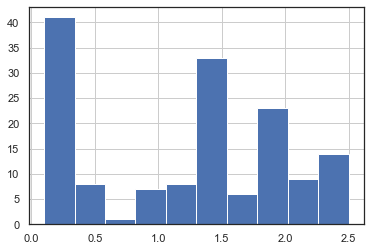

In [13]:
df['PetalWidthCm'].hist()

### Scatter Plot

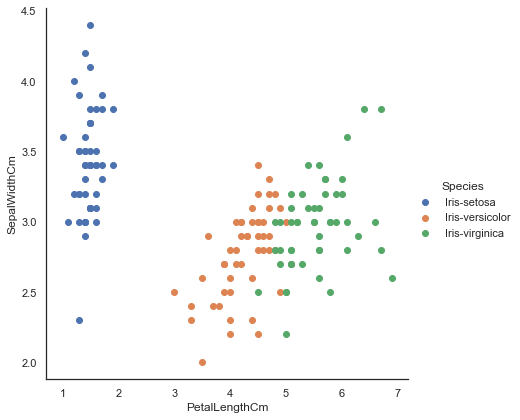

In [15]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

#### Correlation Matrix

In [16]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

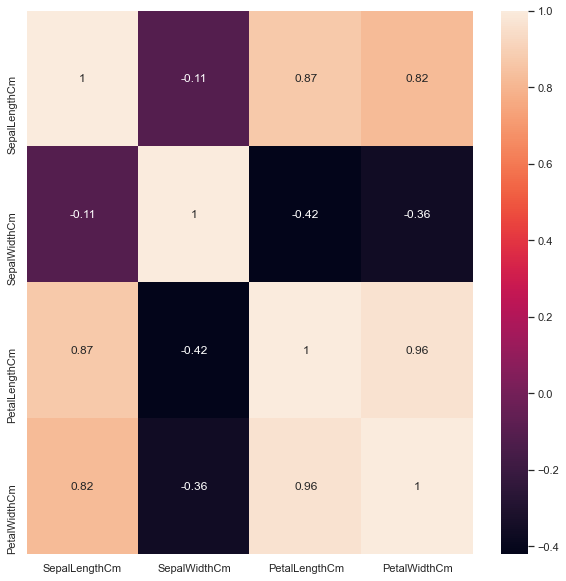

In [17]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax)

##### Petal width and Petal Length are highly correlated so one can be removed

### Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['Species'] = le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Model training

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()

In [23]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
pred= model.predict(x_test)
pred

array([0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0,
       0])

# Evaluation Metrics

In [51]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

### Accuracy

In [59]:
model.score(x_test, y_test)

0.9333333333333333

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known


In [64]:
confusion_matrix(y_test, pred)

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 16]], dtype=int64)

### Precision & Recall/Sensitivity

Precision measures how good our model is when the prediction is positive.

Recall measures how good our model is at correctly predicting positive classes.

True Positives are on the diagonal position
False positives are column-wise sums. Without the diagonal
False negatives are row-wise sums. Without the diagonal.

In [45]:

cm = np.array([[12,0,0], [0,14,1], [0,2,16]])
true_pos = np.diag(cm)
false_pos = np.sum(cm, axis=0) - true_pos
false_neg = np.sum(cm, axis=1) - true_pos
true_neg=33
precision = np.sum(true_pos / (true_pos + false_pos))
print("Precision=",precision)
recall = np.sum(true_pos / (true_pos + false_neg))
print("Recall=",recall)

Precision= 2.8161764705882355
Recall= 2.822222222222222


### F1_score.

It is the weighted average of precision and recall 



In [31]:
F1_score= (2*precision*recall)/(precision+recall)
print("F!_Score=",F1_score)

F!_Score= 2.819196105138088


### Specificity

 the ratio of the True Negative to the number of actual negative cases.

In [47]:
sp = true_neg/(true_neg+false_pos)
print("Specificity= ",sp)

Specificity=  [1.         0.94285714 0.97058824]


### Misclassification Rate

In machine learning, misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model

In [34]:
print("Misclassification Rate: ",np.mean((pred != y_test))*100)

Misclassification Rate:  2.2222222222222223


### ROC

This is a plot that displays the sensitivity and specificity of a logistic regression model.

In [60]:
y_pred_proba = model.predict_proba(x_test)

In [61]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

1.0